# Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
loan=pd.read_csv("loan_sanction_test.csv")

In [5]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Data Exploration
- Display basic information

In [8]:
print("=== Dataset Information ===")
print("Shape:",{loan.shape})
print("First 5 rows:")
loan.head()

=== Dataset Information ===
Shape: {(367, 12)}
First 5 rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
print("Data Types:")
print(loan.dtypes)

Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


- Check for missing values

In [13]:
print("=== Missing Values ===")
missing_values = loan.isnull().sum()
print(missing_values[missing_values > 0])

=== Missing Values ===
Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64


- Basic statistics for numeric columns

In [16]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Data Cleaning
- Handle missing values

In [19]:
### For categorical columns, we will fill with mode
loan.Gender = loan.Gender.fillna(loan.Gender.mode()[0])
loan.Self_Employed = loan.Self_Employed.fillna(loan.Self_Employed.mode()[0])
loan.Dependents = loan.Dependents.fillna(loan.Dependents.mode()[0])
# For numeric columns, fill with median
loan.LoanAmount  = loan.LoanAmount.fillna(loan.LoanAmount.median())
loan.Loan_Amount_Term   = loan.Loan_Amount_Term .fillna(loan.Loan_Amount_Term.median())
loan.Credit_History   = loan.Credit_History.fillna(loan.Credit_History.median())

In [21]:
loan.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Data Visualization
- Univariate Analysis

Text(0.5, 0, 'Income')

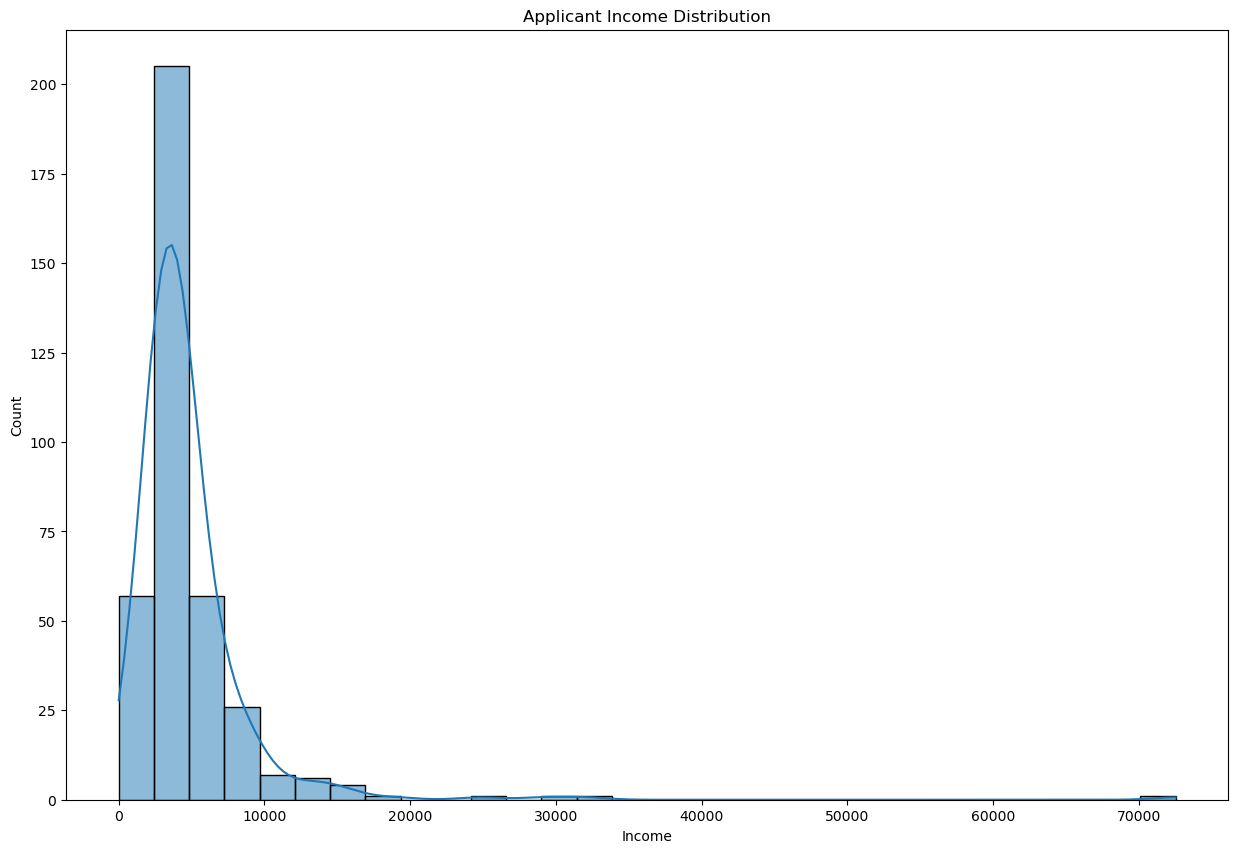

In [24]:
# ApplicantIncome
plt.figure(figsize=(15, 10))
sns.histplot(loan['ApplicantIncome'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Income')

Text(0.5, 0, 'Income')

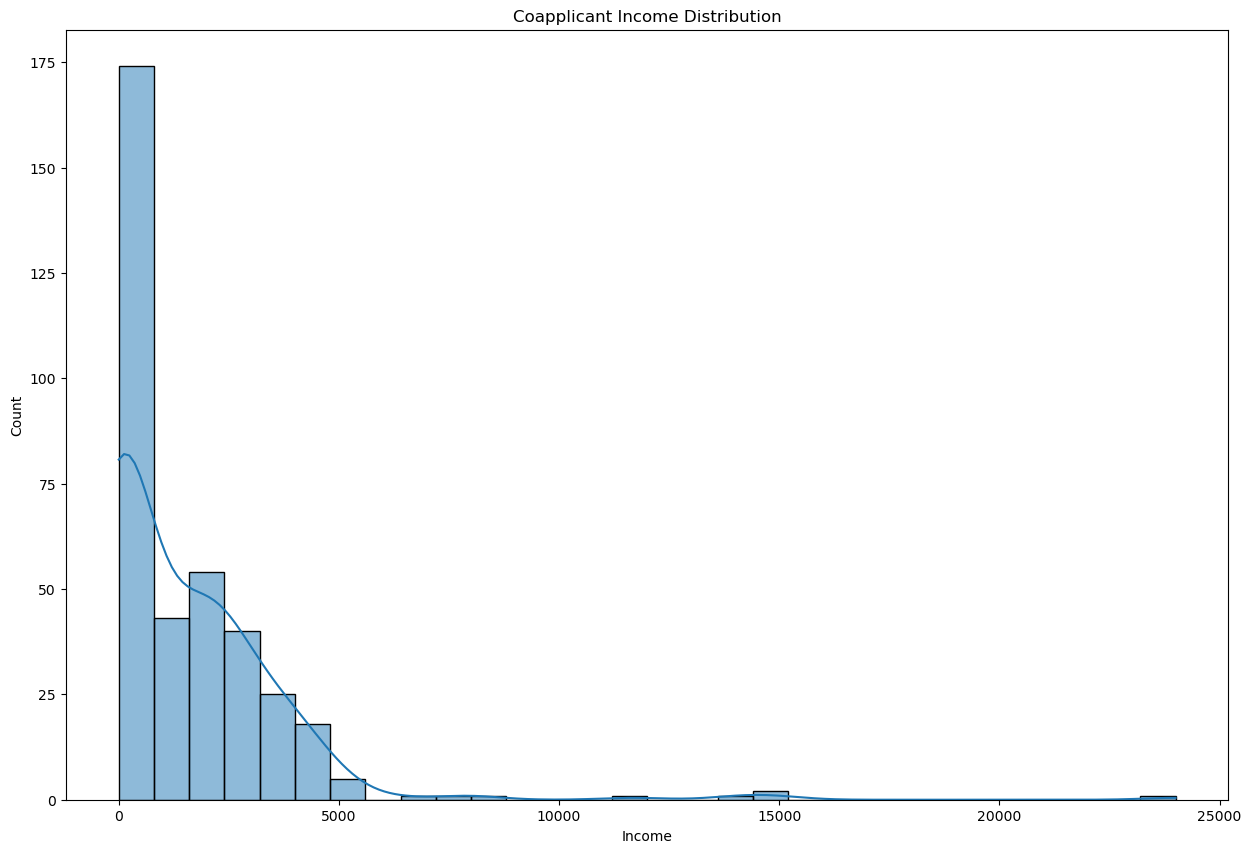

In [25]:
# CoapplicantIncome
plt.figure(figsize=(15, 10))
sns.histplot(loan['CoapplicantIncome'], bins=30, kde=True)
plt.title('Coapplicant Income Distribution')
plt.xlabel('Income')

Text(0.5, 0, 'Loan Amount (in thousands)')

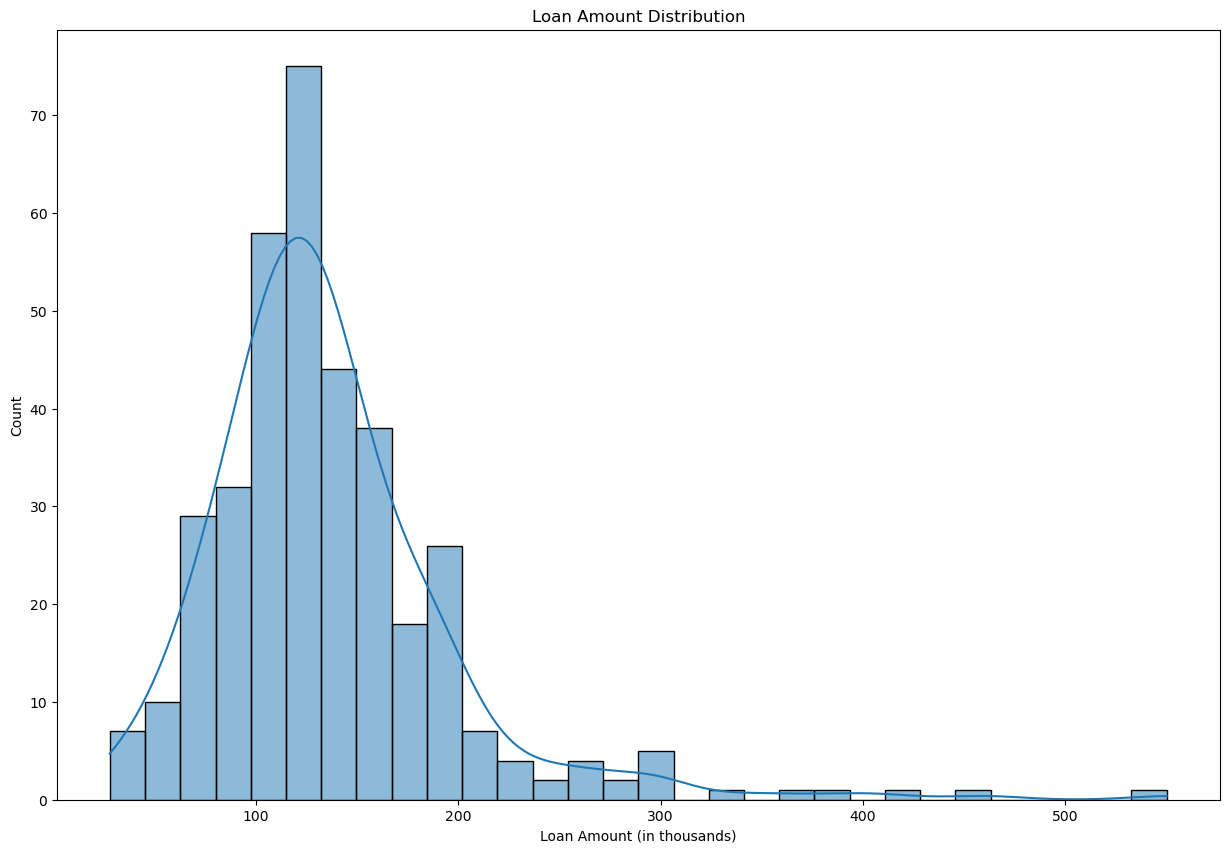

In [26]:
# LoanAmount
plt.figure(figsize=(15, 10))
sns.histplot(loan['LoanAmount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount (in thousands)')

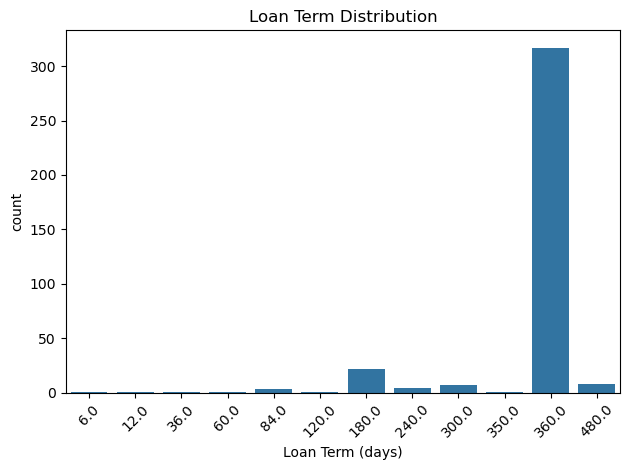

In [27]:
# Loan_Amount_Term
sns.countplot(x='Loan_Amount_Term', data=loan)
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Applicant Income')

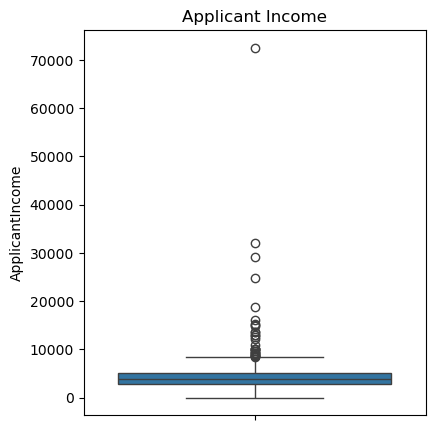

In [28]:
# Boxplots for numeric variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y='ApplicantIncome', data=loan)
plt.title('Applicant Income')

Text(0.5, 1.0, 'Coapplicant Income')

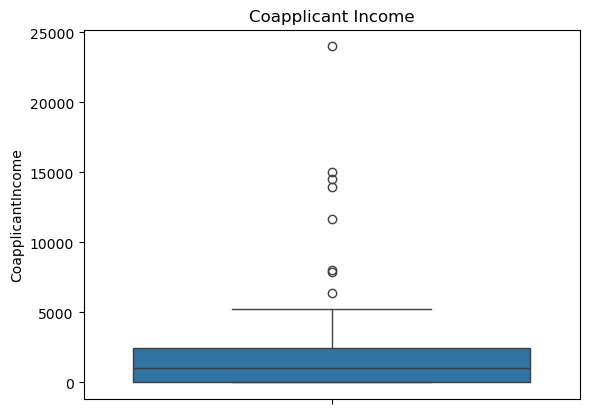

In [30]:
sns.boxplot(y='CoapplicantIncome', data=loan)
plt.title('Coapplicant Income')

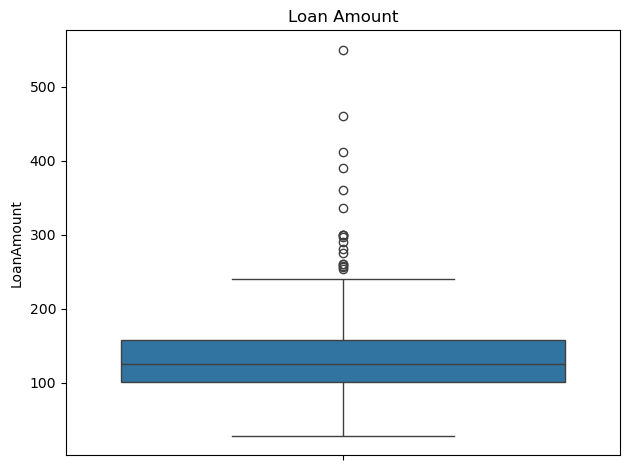

In [31]:
sns.boxplot(y='LoanAmount', data=loan)
plt.title('Loan Amount')

plt.tight_layout()
plt.show()


- Categorical Variables

Text(0.5, 1.0, 'Gender Distribution')

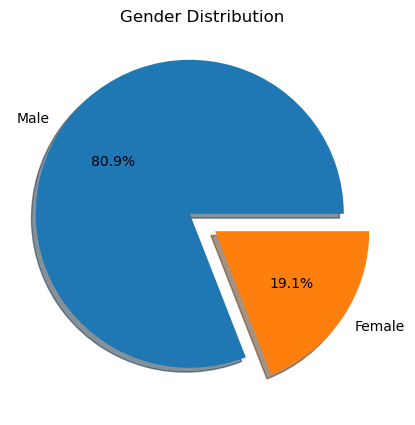

In [34]:
# Gender
plt.figure(figsize=(10,5))
gender_counts = loan['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',shadow=True,explode=[0.1,0.1])
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Education Level')

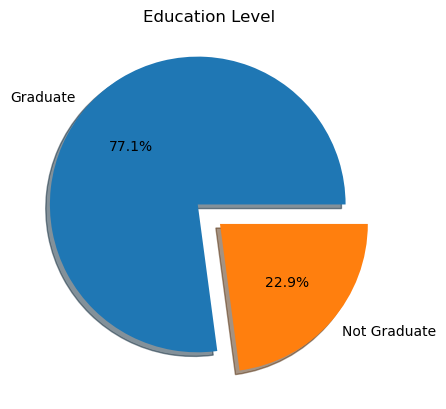

In [38]:
# Education
education_counts = loan['Education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%',shadow=True,explode=[0.1,0.1])
plt.title('Education Level')

Text(0.5, 1.0, 'Property Area Distribution')

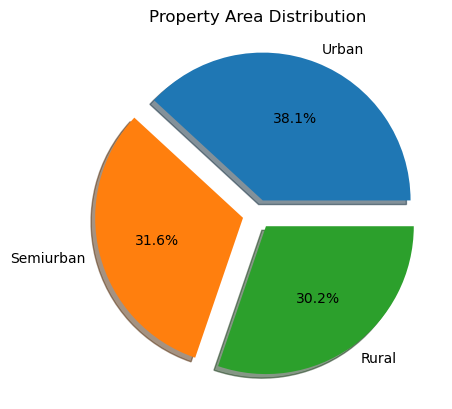

In [40]:
# Property Area
property_counts = loan['Property_Area'].value_counts()
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%',shadow=True,explode=[0.1,0.1,0.1])
plt.title('Property Area Distribution')

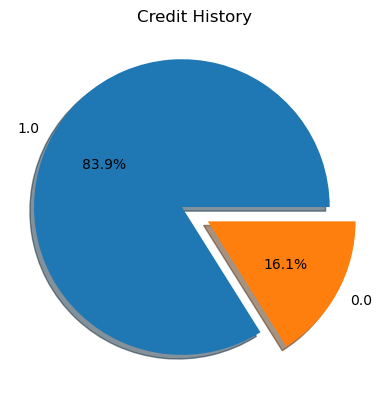

In [43]:
# Credit History
credit_counts = loan['Credit_History'].value_counts()
plt.pie(credit_counts,labels=credit_counts.index, autopct='%1.1f%%',shadow=True,explode=[0.1,0.1])
plt.title('Credit History')
plt.show()

- Bivariate Analysis

Text(0.5, 1.0, 'Applicant Income vs Loan Amount')

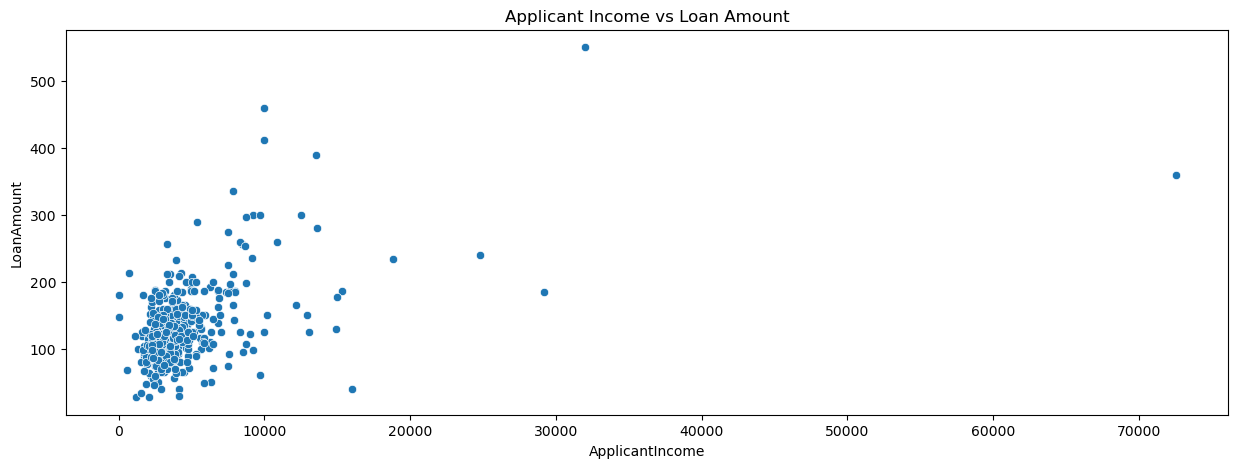

In [48]:
# ApplicantIncome vs LoanAmount
plt.figure(figsize=(15, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=loan)
plt.title('Applicant Income vs Loan Amount')

Text(0.5, 1.0, 'Coapplicant Income vs Loan Amount')

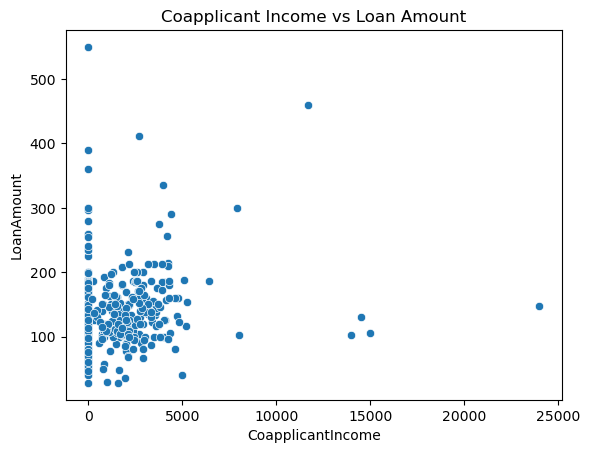

In [49]:
# CoapplicantIncome vs LoanAmount
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=loan)
plt.title('Coapplicant Income vs Loan Amount')

<Figure size 1500x500 with 0 Axes>

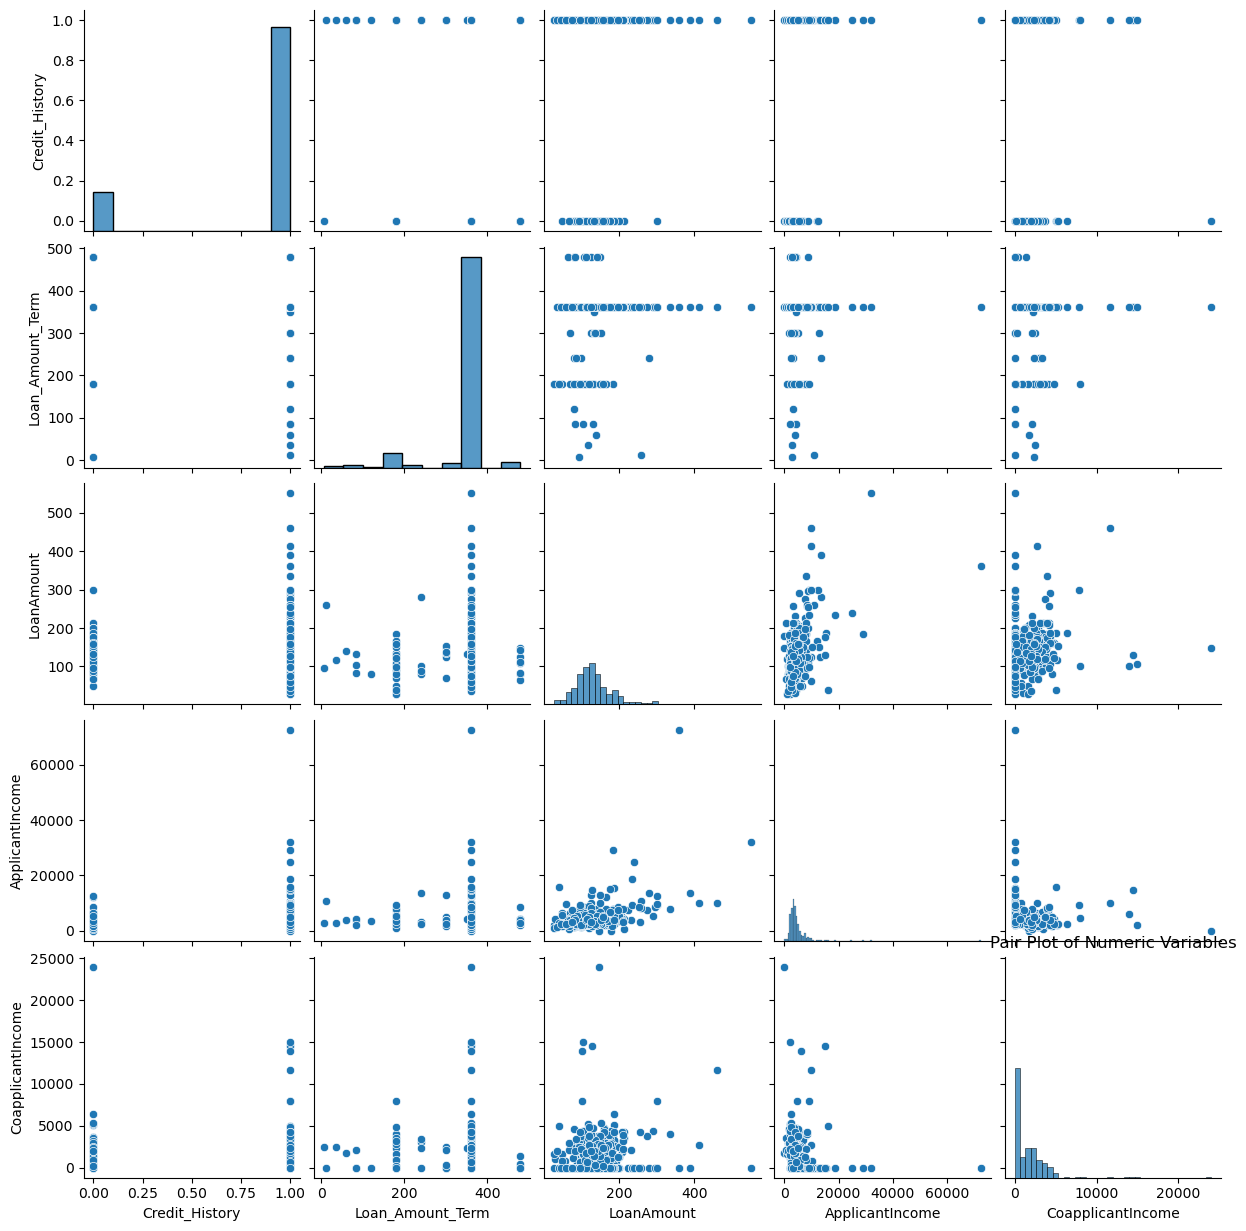

In [51]:
# Pairplot for multiple numeric variables
plt.figure(figsize=(15,5))
numeric=['Credit_History','Loan_Amount_Term','LoanAmount','ApplicantIncome','CoapplicantIncome']
sns.pairplot(loan[numeric])
plt.title('Pair Plot of Numeric Variables')
plt.show()

Text(0.5, 1.0, 'Loan Amount by Credit History')

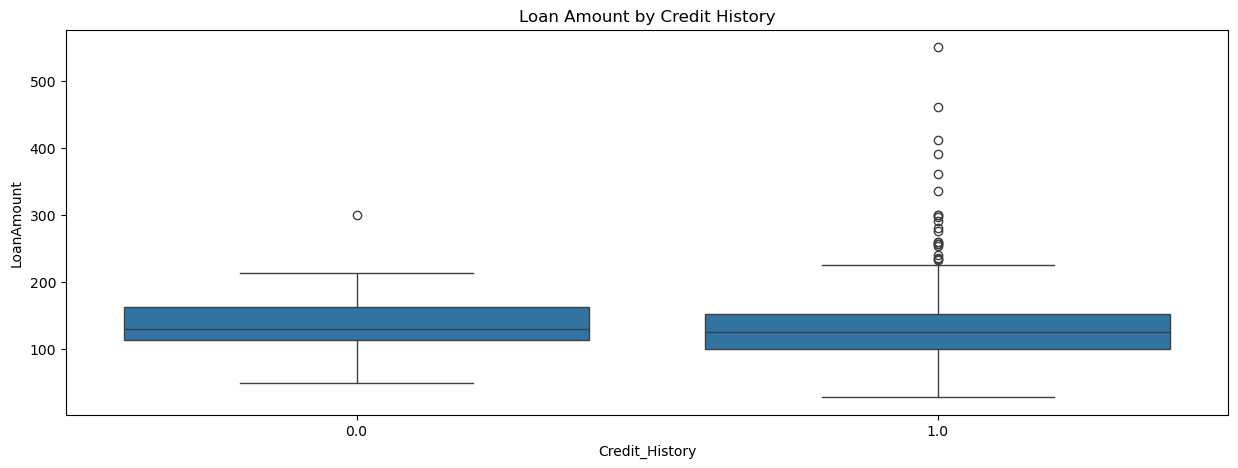

In [52]:
# LoanAmount by Credit History
plt.figure(figsize=(15, 5))
sns.boxplot(x='Credit_History', y='LoanAmount', data=loan)
plt.title('Loan Amount by Credit History')

Text(0.5, 1.0, 'Applicant Income by Education')

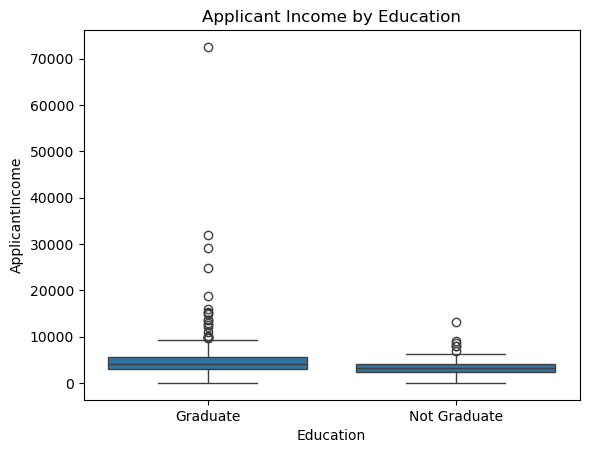

In [54]:
# ApplicantIncome by Education
sns.boxplot(x='Education', y='ApplicantIncome', data=loan)
plt.title('Applicant Income by Education')

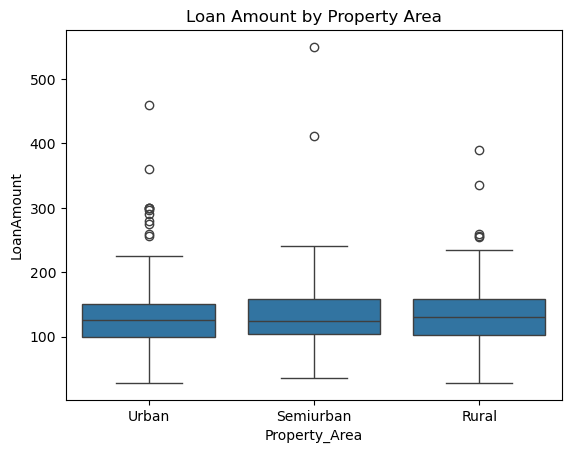

In [55]:
# LoanAmount by Property Area
sns.boxplot(x='Property_Area', y='LoanAmount', data=loan)
plt.title('Loan Amount by Property Area')
plt.show()

- Multivariate Analysis

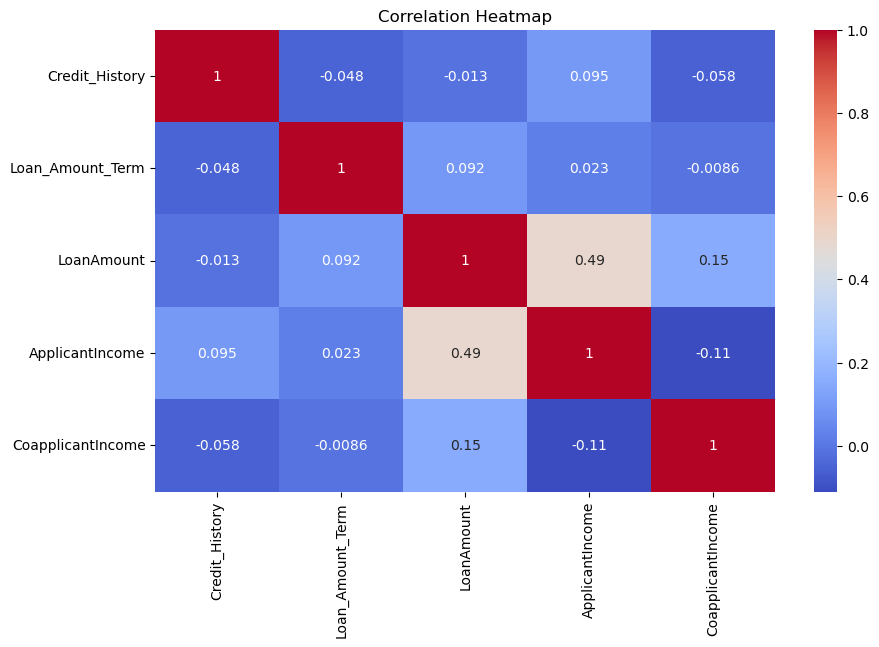

In [57]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = loan[numeric].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

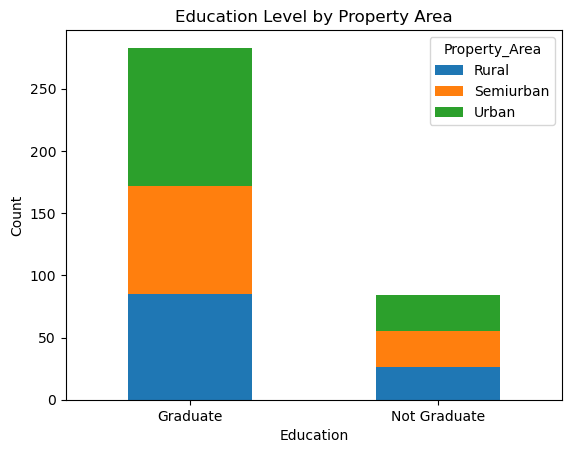

In [58]:
# Stacked Bar Chart - Education vs Property Area
cross_tab = pd.crosstab(loan['Education'],loan['Property_Area'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Education Level by Property Area')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [59]:
# Loan Approval Status (assuming Credit_History=1 means approved)
loan['Loan_Status'] = loan['Credit_History'].apply(lambda x: 'Approved' if x == 1 else 'Rejected')

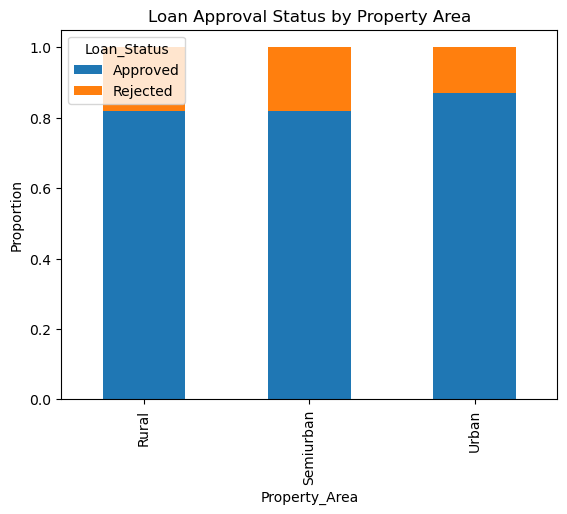

In [60]:
# Approval Rate by Property Area
approval_by_area = loan.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack()
approval_by_area.plot(kind='bar', stacked=True)
plt.title('Loan Approval Status by Property Area')
plt.ylabel('Proportion')
plt.show()

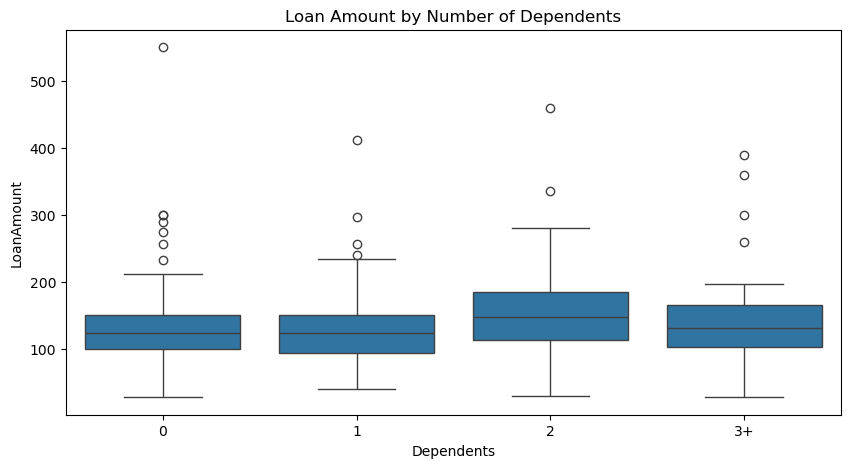

In [61]:
# Dependents vs Loan Amount
plt.figure(figsize=(10, 5))
sns.boxplot(x='Dependents', y='LoanAmount', data=loan)
plt.title('Loan Amount by Number of Dependents')
plt.show()

# Key Insights Summary

In [78]:
print("=== Key Insights ===")
print(f"1. Most applicants are male ({gender_counts['Male']/len(loan)*100:.1f}%)")
print(f"2. Majority are graduates ({education_counts['Graduate']/len(loan)*100:.1f}%)")
print(f"3. Highest approval rates in urban areas ({approval_by_area.loc['Urban', 'Approved']*100:.1f}%)")
print(f"4. Strong correlation between ApplicantIncome and LoanAmount: {correlation_matrix.loc['ApplicantIncome','LoanAmount']:.2f}")
print(f"5. {credit_counts[1]/len(loan)*100:.1f}% of applicants have good credit history")
approved_by_area = loan.groupby('Property_Area')['Loan_Status'].value_counts().unstack()
print(f"6."'approved_by_area')
approved_by_area

=== Key Insights ===
1. Most applicants are male (80.9%)
2. Majority are graduates (77.1%)
3. Highest approval rates in urban areas (87.1%)
4. Strong correlation between ApplicantIncome and LoanAmount: 0.49
5. 83.9% of applicants have good credit history
6.approved_by_area


Loan_Status,Approved,Rejected
Property_Area,,
Rural,91,20
Semiurban,95,21
Urban,122,18
